In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams["axes.unicode_minus"] = False
train_data = pd.read_csv(r'used_car_train_20200313.csv', sep=' ')
test_data = pd.read_csv(r'used_car_testB_20200421.csv', sep=' ')

In [2]:
train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [3]:
train_data.shape

(150000, 31)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [5]:
train_data.isna().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [6]:
test_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,...,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,...,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,...,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,...,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,...,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014


In [7]:
test_data.isna().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1504
fuelType             2924
gearbox              1968
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [8]:
train_data['model'].fillna(-1, inplace=True)
mode_value = train_data['bodyType'].mode()[0]
train_data['bodyType'].fillna(mode_value, inplace=True)
mode_value1 = test_data['bodyType'].mode()[0]
test_data['bodyType'].fillna(mode_value1, inplace=True)
mode_value = train_data['fuelType'].mode()[0]
train_data['fuelType'].fillna(mode_value, inplace=True)
mode_value1 = test_data['fuelType'].mode()[0]
test_data['fuelType'].fillna(mode_value1, inplace=True)
mode_value = train_data['gearbox'].mode()[0]
train_data['gearbox'].fillna(mode_value, inplace=True)
mode_value1 = test_data['gearbox'].mode()[0]
test_data['gearbox'].fillna(mode_value1, inplace=True)

In [9]:
date_cols = ['regDate', 'creatDate']
cate_cols = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode', 'seller', 'offerType']
num_cols = ['power', 'kilometer'] + ['v_{}'.format(i) for i in range(15)]
data = pd.concat([train_data, test_data])
cols = date_cols + cate_cols + num_cols

tmp = pd.DataFrame()
tmp['count'] = data[cols].count().values
tmp['missing_rate'] = (data.shape[0] - tmp['count']) / data.shape[0]
tmp['nunique'] = data[cols].nunique().values
tmp.index = cols
tmp

,count,missing_rate,nunique
regDate,200000,0.0,3898
creatDate,200000,0.0,106
name,200000,0.0,128660
model,200000,0.0,249
brand,200000,0.0,40
bodyType,200000,0.0,8
fuelType,200000,0.0,7
gearbox,200000,0.0,2
notRepairedDamage,200000,0.0,3
regionCode,200000,0.0,8010


In [10]:
# 删去无效特征字段SaleID
train_data.drop('SaleID', axis=1, inplace=True)
SaleID = test_data['SaleID']
test_data.drop('SaleID', axis=1, inplace=True)

In [11]:
#对regDate和creatDate拆分，年月日
train_data['regDate_y'] = (train_data['regDate']/10000).astype('int64')
train_data['regDate_m'] = (train_data['regDate']/100-train_data['regDate_y']*100).astype('int64')
train_data['regDate_d'] = (train_data['regDate']-train_data['regDate_m']*100-train_data['regDate_y']*10000).astype('int64')
train_data['creatDate_y'] = (train_data['creatDate']/10000).astype('int64')
train_data['creatDate_m'] = (train_data['creatDate']/100-train_data['creatDate_y']*100).astype('int64')
train_data['creatDate_d'] = (train_data['creatDate']-train_data['creatDate_m']*100-train_data['creatDate_y']*10000).astype('int64')
test_data['regDate_y'] = (test_data['regDate']/10000).astype('int64')
test_data['regDate_m'] = (test_data['regDate']/100-test_data['regDate_y']*100).astype('int64')
test_data['regDate_d'] = (test_data['regDate']-test_data['regDate_m']*100-test_data['regDate_y']*10000).astype('int64')
test_data['creatDate_y'] = (test_data['creatDate']/10000).astype('int64')
test_data['creatDate_m'] = (test_data['creatDate']/100-test_data['creatDate_y']*100).astype('int64')
test_data['creatDate_d'] = (test_data['creatDate']-test_data['creatDate_m']*100-test_data['creatDate_y']*10000).astype('int64')
train_data.drop(['regDate','creatDate'], axis=1, inplace=True)
test_data.drop(['regDate','creatDate'], axis=1, inplace=True)

array([[<AxesSubplot:title={'center':'name'}>,
        <AxesSubplot:title={'center':'model'}>,
        <AxesSubplot:title={'center':'brand'}>,
        <AxesSubplot:title={'center':'bodyType'}>,
        <AxesSubplot:title={'center':'fuelType'}>,
        <AxesSubplot:title={'center':'gearbox'}>],
       [<AxesSubplot:title={'center':'power'}>,
        <AxesSubplot:title={'center':'kilometer'}>,
        <AxesSubplot:title={'center':'regionCode'}>,
        <AxesSubplot:title={'center':'seller'}>,
        <AxesSubplot:title={'center':'offerType'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'v_0'}>,
        <AxesSubplot:title={'center':'v_1'}>,
        <AxesSubplot:title={'center':'v_2'}>,
        <AxesSubplot:title={'center':'v_3'}>,
        <AxesSubplot:title={'center':'v_4'}>,
        <AxesSubplot:title={'center':'v_5'}>],
       [<AxesSubplot:title={'center':'v_6'}>,
        <AxesSubplot:title={'center':'v_7'}>,
        <AxesSubplot:title={'cen

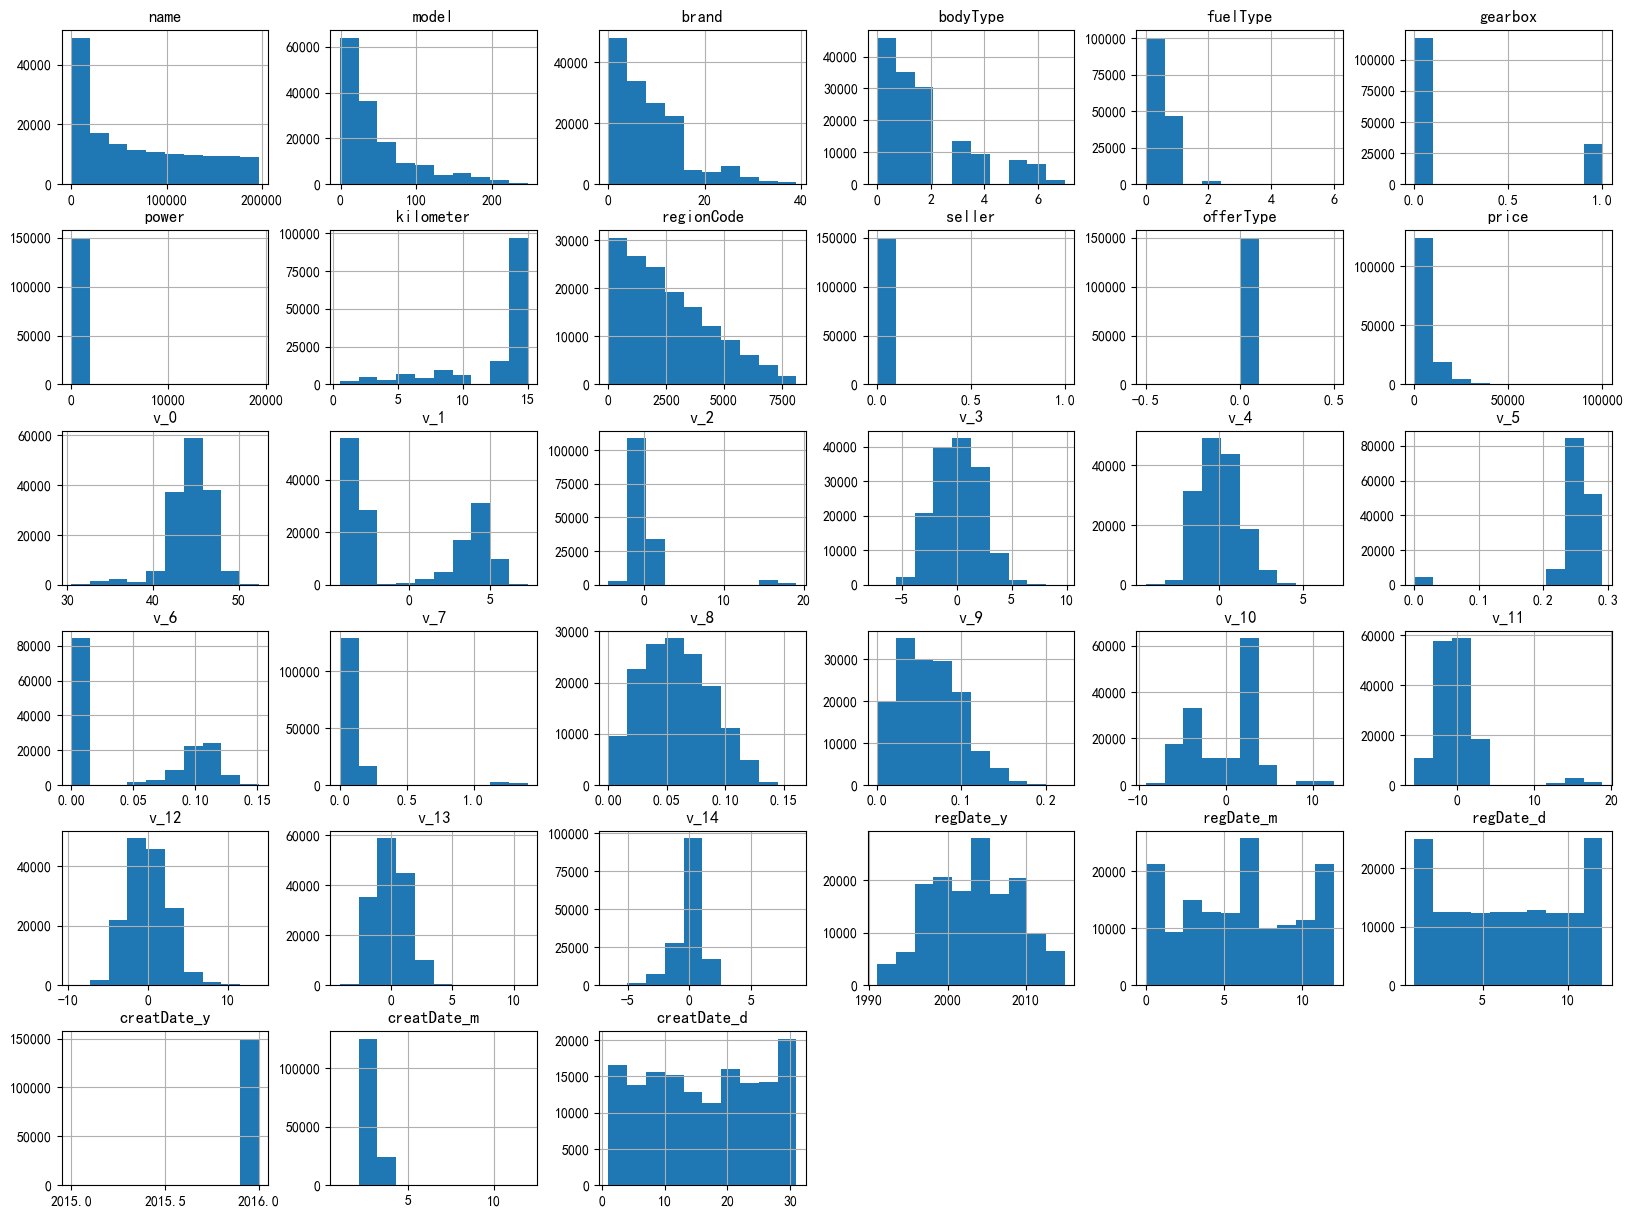

In [12]:
#查看特征的直方图
train_data.hist(figsize=(20,15))

In [13]:
print(train_data['offerType'].unique())
train_data['offerType'].isna().any()
train_data.drop('offerType', axis=1, inplace=True)
test_data.drop('offerType', axis=1, inplace=True)

[0]


In [14]:
print(train_data['seller'].unique())
train_data['seller'].isna().any()

[0 1]


False

In [15]:
#notRepairedDamage	汽车有尚未修复的损坏：是：0，否：1
mapping = {'0.0': 0, '-': -1, '1.0': 1}
train_data['notRepairedDamage'] = train_data['notRepairedDamage'].map(mapping).astype(int)
test_data['notRepairedDamage'] = test_data['notRepairedDamage'].map(mapping).astype(int)

In [16]:
def count_out_of_range(series):
    q1, q3 = np.percentile(series, [25, 75])
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    # 计算大于上限的个数
    count_above = len(series[series > upper_limit])

    # 计算小于下限的个数
    count_below = len(series[series < lower_limit])

    # 返回结果
    return count_above, count_below
outlier_counts = train_data.apply(count_out_of_range)

# 打印结果
print(outlier_counts)

   name  model  brand  bodyType  fuelType  gearbox  power  kilometer  \
0     0   9720   1852         0       461    32396   4878          0   
1     0      0      0         0         0        0      0      25685   

   notRepairedDamage  regionCode  ...  v_11  v_12  v_13  v_14  regDate_y  \
0              14315          25  ...  4506   996   185    93          0   
1              24324           0  ...     0    23     8  7463          0   

   regDate_m  regDate_d  creatDate_y  creatDate_m  creatDate_d  
0          0          0            0        24362            0  
1          0          0           18          212            0  

[2 rows x 33 columns]


In [17]:
#model	车型编码，已脱敏
train_data['model'].value_counts()

 0.0      11762
 19.0      9573
 4.0       8445
 1.0       6038
 29.0      5186
          ...  
 209.0        2
 245.0        2
 242.0        2
-1.0          1
 247.0        1
Name: model, Length: 249, dtype: int64

In [18]:
#gearbox	变速箱：手动：0，自动：1
train_data['gearbox'].value_counts()

0.0    117604
1.0     32396
Name: gearbox, dtype: int64

In [19]:
#异常值截断
train_data.loc[train_data['power']>600, 'power'] = 600
train_data.loc[train_data['power']<1, 'power'] = 1
test_data.loc[test_data['power']>600, 'power'] = 600
test_data.loc[test_data['power']<0, 'power'] = 0
train_data.loc[train_data['v_13']>6, 'v_13'] = 6
test_data.loc[test_data['v_13']>6, 'v_13'] = 6
train_data.loc[train_data['v_14']>4, 'v_14'] = 4
test_data.loc[test_data['v_14']>4, 'v_14'] = 4

In [20]:
# 使用 fillna() 方法填充缺失值将含有空值和“-”的值全部替换为
train_data['notRepairedDamage'] = train_data['notRepairedDamage'].replace('-', np.nan)
train_data['notRepairedDamage'].fillna(0, inplace=True)

test_data['notRepairedDamage'] = test_data['notRepairedDamage'].replace('-', np.nan)
test_data['notRepairedDamage'].fillna(0, inplace=True)

In [21]:
tmp = pd.DataFrame(index = num_cols)
for col in num_cols:
    tmp.loc[col, 'train_Skewness'] = train_data[col].skew()
    tmp.loc[col, 'test_Skewness'] = test_data[col].skew()
    tmp.loc[col, 'train_Kurtosis'] = train_data[col].kurt()
    tmp.loc[col, 'test_Kurtosis'] = test_data[col].kurt()
tmp

,train_Skewness,test_Skewness,train_Kurtosis,test_Kurtosis
power,1.256965,1.259755,4.843112,4.917405
kilometer,-1.525921,-1.523389,1.141934,1.132865
v_0,-1.316712,-1.309174,3.993841,3.975003
v_1,0.359454,0.371557,-1.753017,-1.741503
v_2,4.842556,4.842439,23.860591,23.851258
v_3,0.106292,0.085307,-0.418006,-0.441850
v_4,0.367989,0.376527,-0.197295,-0.217030
v_5,-4.737094,-4.729964,22.934081,22.874850
v_6,0.368073,0.380337,-1.742567,-1.730630
v_7,5.130233,5.127163,25.845489,25.825960


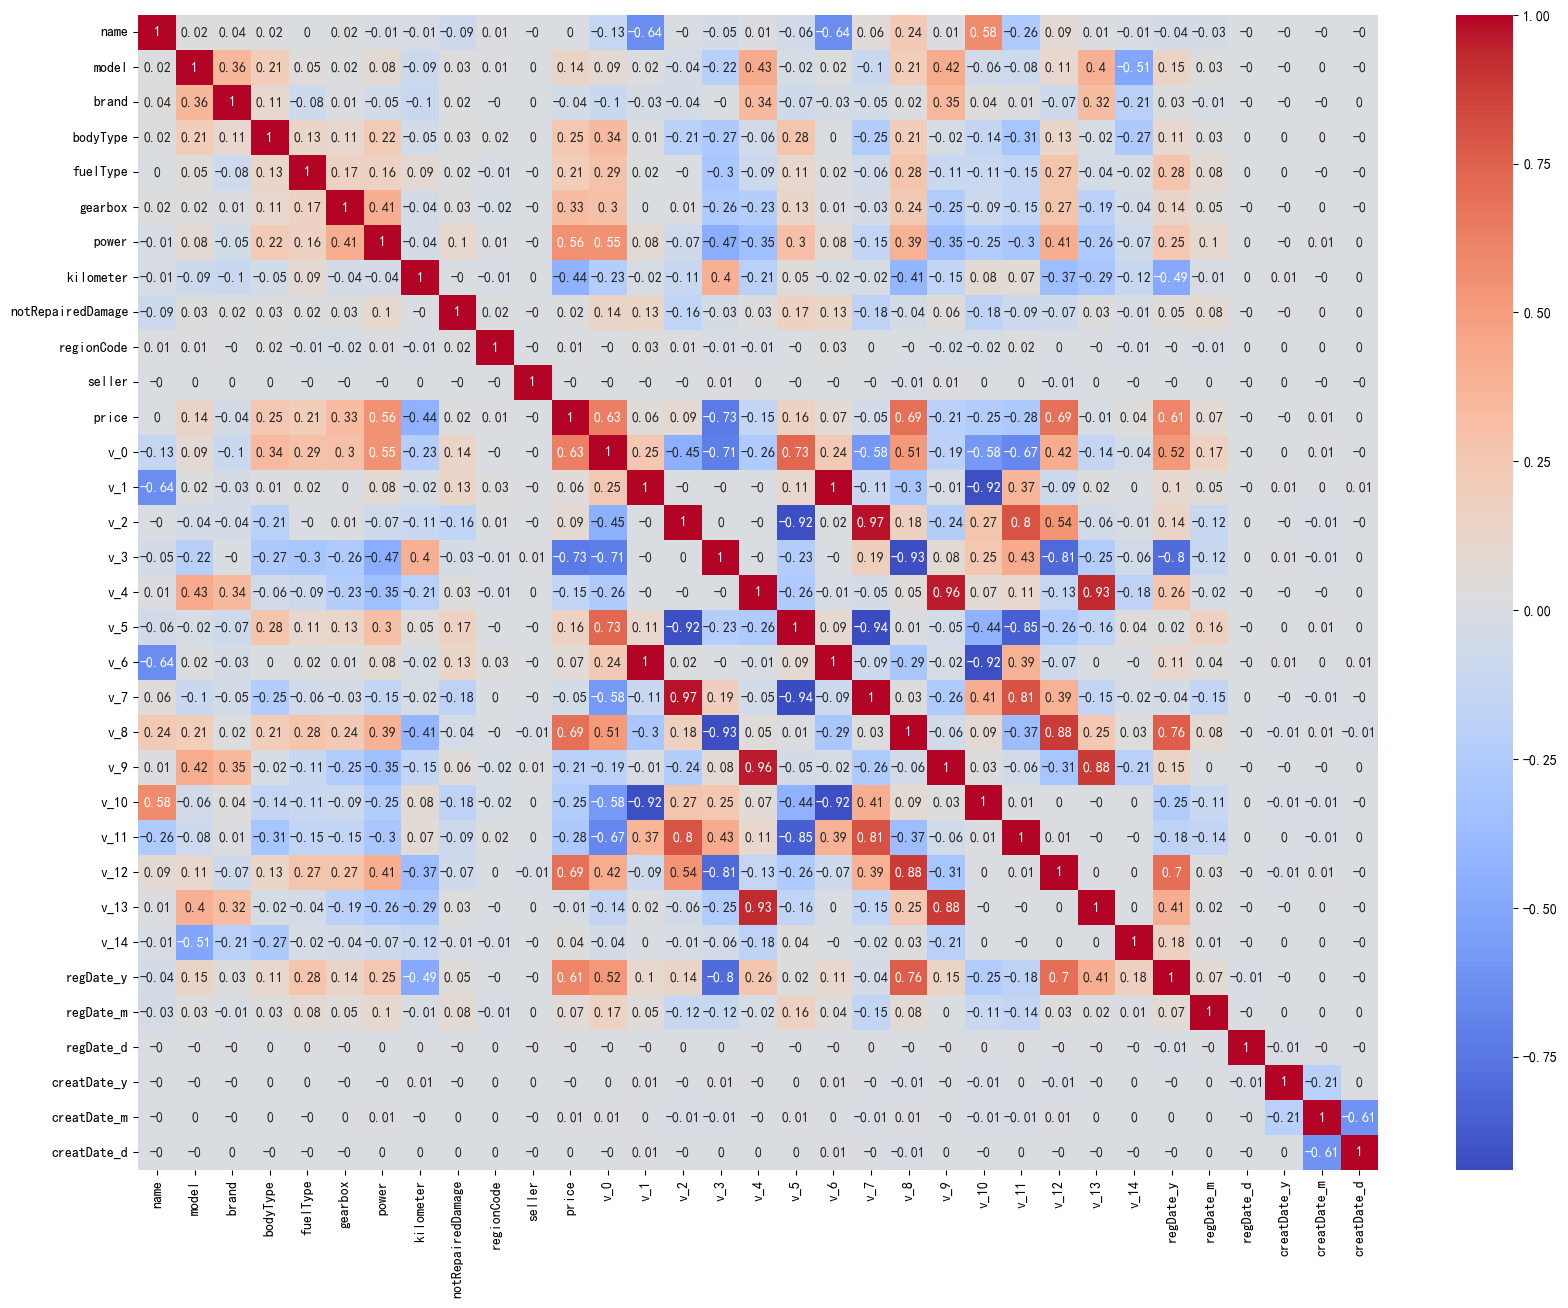

In [22]:
#设置画布大小
plt.figure(figsize=(20,15))
# 通过热力图查看特征之间的相关性
sns.heatmap(train_data.corr().round(2), annot=True, cmap='coolwarm')
plt.show()

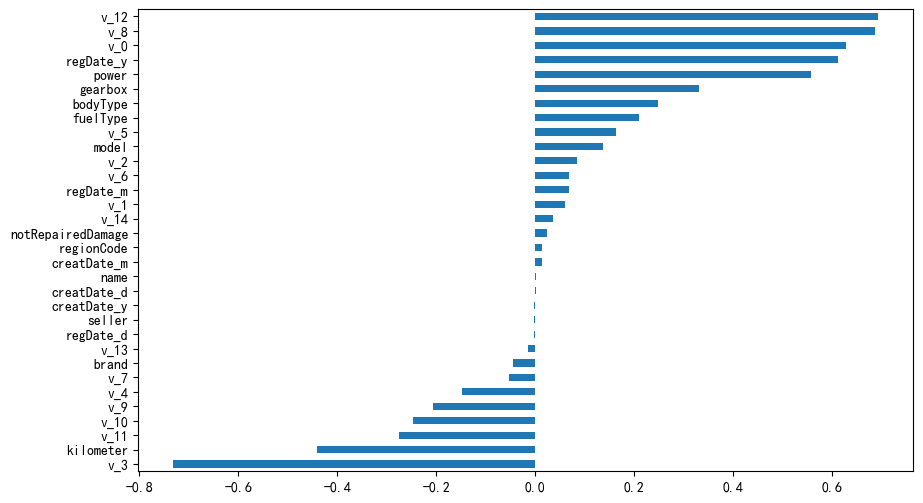

In [23]:
##对特征值排序可视化
f, ax = plt.subplots(figsize=(10, 6))
train_data.corr()['price'].drop('price').sort_values().plot.barh();

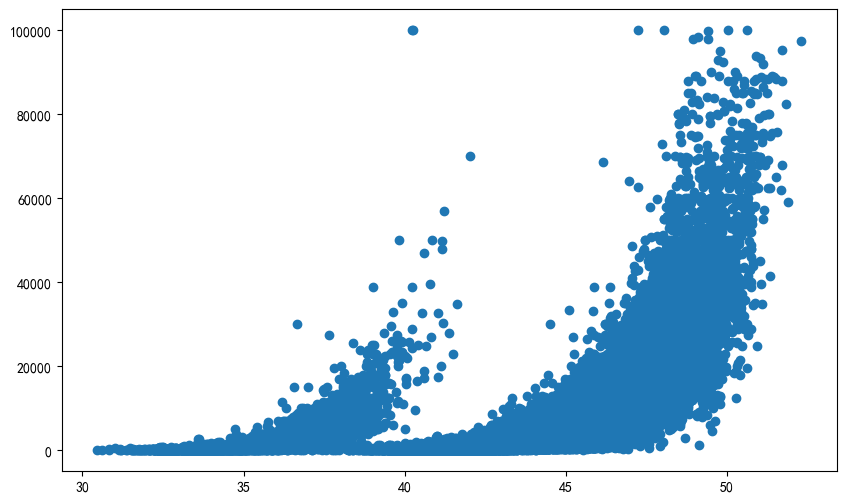

In [24]:
#绘制特征与车价的散点图
#设置画布大小
plt.figure(figsize=(10,6))
#绘制散点图
plt.scatter(train_data['v_0'],train_data['price'])
#显示图形
plt.show()

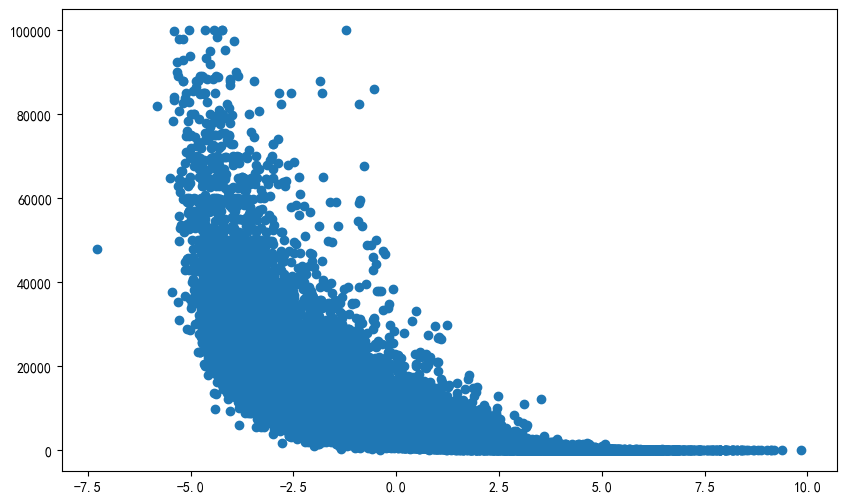

In [25]:
#绘制特征与车价的散点图
#设置画布大小
plt.figure(figsize=(10,6))
#绘制散点图
plt.scatter(train_data['v_3'],train_data['price'])
#显示图形
plt.show()

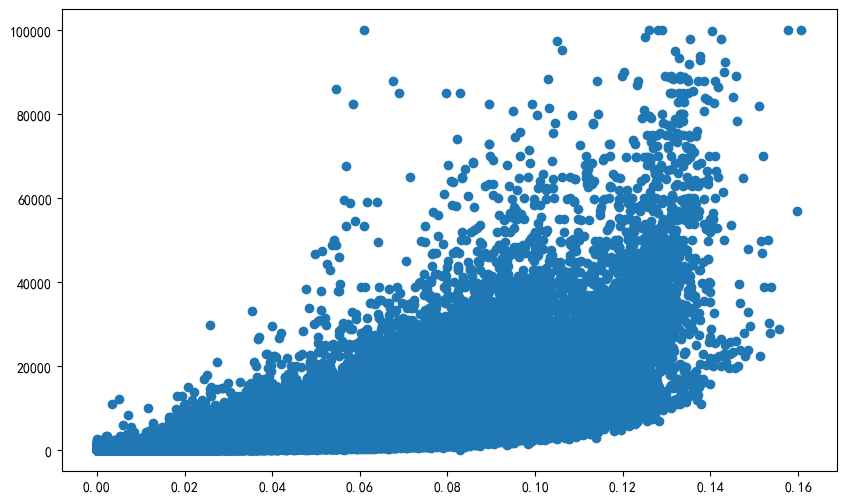

In [26]:
#绘制特征与车价的散点图
#设置画布大小
plt.figure(figsize=(10,6))
#绘制散点图
plt.scatter(train_data['v_8'],train_data['price'])
#显示图形
plt.show()

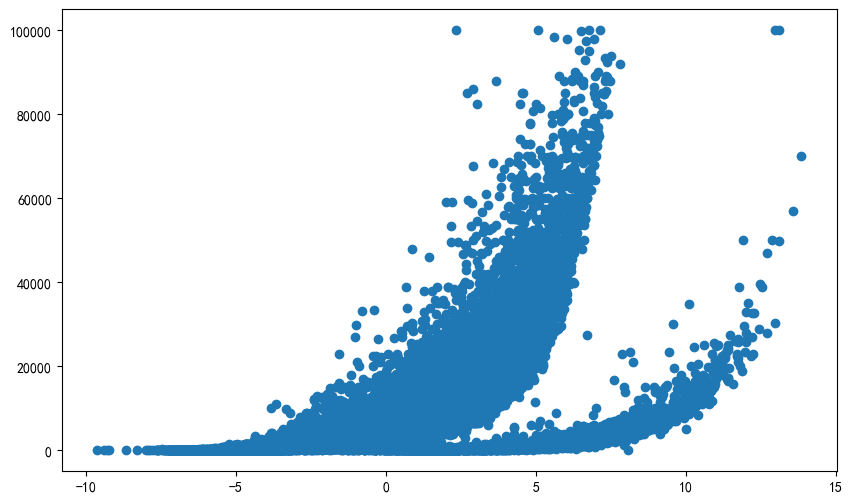

In [27]:
#绘制特征与车价的散点图
#设置画布大小
plt.figure(figsize=(10,6))
#绘制散点图
plt.scatter(train_data['v_12'],train_data['price'])
#显示图形
plt.show()

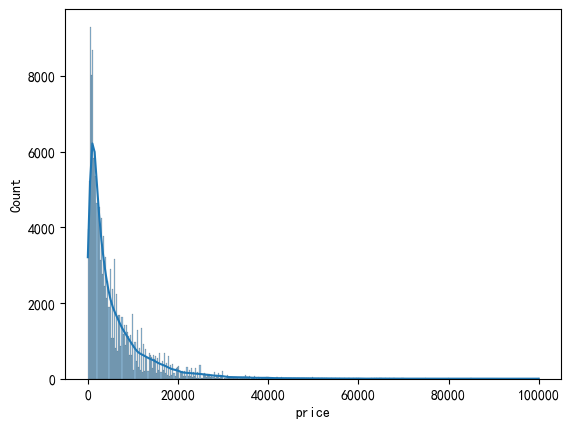

In [28]:
sns.histplot(train_data['price'], kde=True)
plt.show()

<AxesSubplot:xlabel='price', ylabel='Count'>

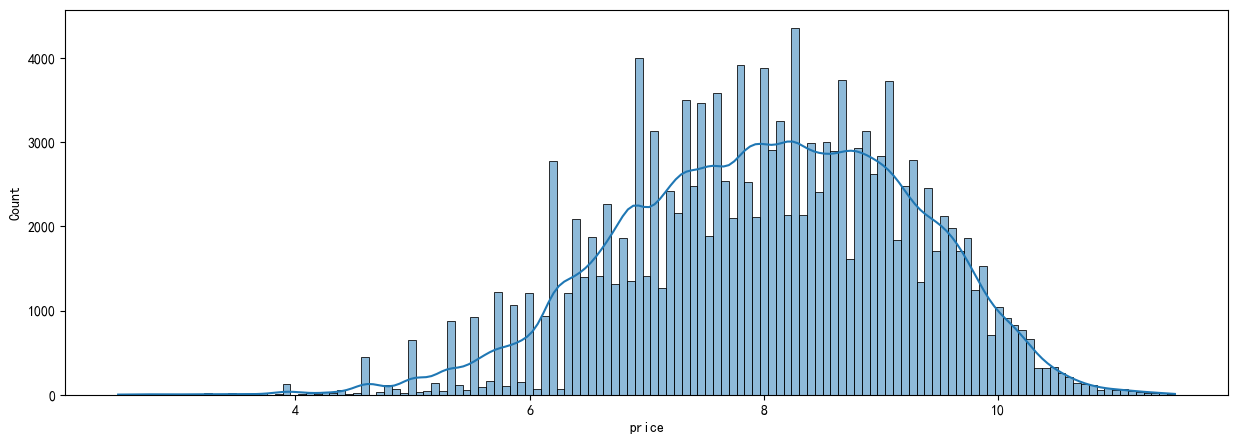

In [29]:
#分布转换
train_data['price'] = np.log1p(train_data['price'])
plt.figure(figsize=(15,5))
sns.histplot(train_data['price'], kde=True)

In [30]:
train_data['price']

0         7.523481
1         8.188967
2         8.736007
3         7.783641
4         8.556606
            ...   
149995    8.682877
149996    9.159152
149997    8.922792
149998    8.517193
149999    8.455531
Name: price, Length: 150000, dtype: float64

In [31]:
x = train_data.drop('price', axis=1)
y = train_data['price']

In [32]:
## 数据标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_stand = scaler.fit_transform(x)
print(x, X_stand)

          name  model  brand  bodyType  fuelType  gearbox  power  kilometer  \
0          736   30.0      6       1.0       0.0      0.0     60       12.5   
1         2262   40.0      1       2.0       0.0      0.0      1       15.0   
2        14874  115.0     15       1.0       0.0      0.0    163       12.5   
3        71865  109.0     10       0.0       0.0      1.0    193       15.0   
4       111080  110.0      5       1.0       0.0      0.0     68        5.0   
...        ...    ...    ...       ...       ...      ...    ...        ...   
149995  163978  121.0     10       4.0       0.0      1.0    163       15.0   
149996  184535  116.0     11       0.0       0.0      0.0    125       10.0   
149997  147587   60.0     11       1.0       1.0      0.0     90        6.0   
149998   45907   34.0     10       3.0       1.0      0.0    156       15.0   
149999  177672   19.0     28       6.0       0.0      1.0    193       12.5   

        notRepairedDamage  regionCode  ...      v_1

In [33]:
#抽取最相关的几个特征进行训练
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=17)
x_best = selector.fit_transform(X_stand,y)
x_best

array([[-0.41943342, -0.65603829, -0.52484933, ...,  0.85058155,
        -0.96352055,  0.11988076],
       [ 0.14849925, -0.65603829, -0.52484933, ...,  0.63519928,
        -0.41124451, -0.06660926],
       [-0.41943342, -0.65603829, -0.52484933, ...,  0.5461021 ,
         0.6198753 ,  0.11988076],
       ...,
       [-0.41943342,  1.19668874, -0.52484933, ..., -0.49898997,
         0.90781024,  1.23882087],
       [ 0.71643192,  1.19668874, -0.52484933, ..., -0.80423159,
         0.56013586,  0.4928608 ],
       [ 2.42022994, -0.65603829,  1.9053087 , ..., -0.97044704,
         0.01068967, -0.81256934]])

In [34]:
from sklearn.model_selection import train_test_split
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(x_best, y, test_size=0.2)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
# 训练模型
model = LinearRegression()
model = model.fit(X_train, y_train)

# 预测价格
y_pred = model.predict(X_test)
#均方误差
mse = mean_squared_error(y_test,y_pred)
print("测试数据的误差：",mse)
train_y_pred = model.predict(X_train)
print('MAE of Stacking-LR for training set:',mean_absolute_error(y_train,train_y_pred))
print('MAE of Stacking-LR for testing set:',mean_absolute_error(y_test,y_pred))

测试数据的误差： 0.09641955971270187
MAE of Stacking-LR for training set: 0.19641614014374079
MAE of Stacking-LR for testing set: 0.1956683852188137


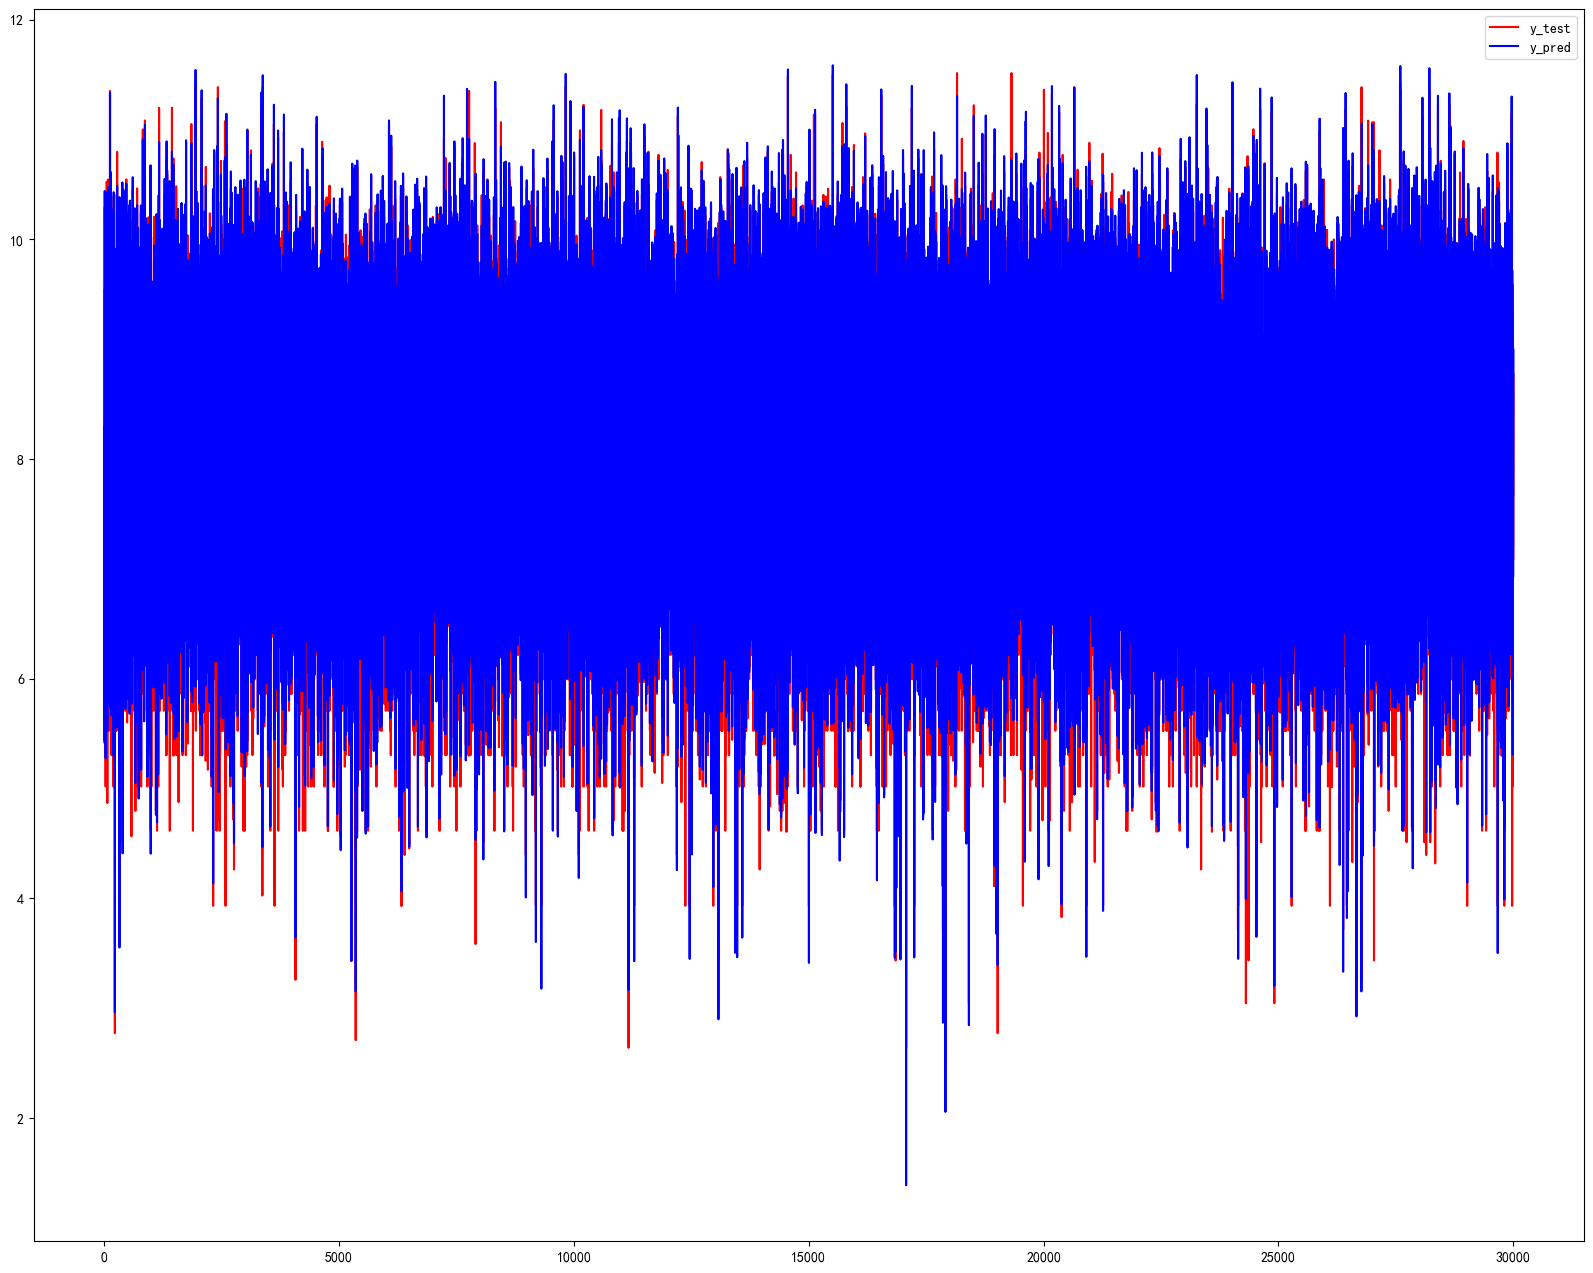

In [35]:
plt.figure(figsize=(20, 16))
plt.plot(y_test.values,c="r",label="y_test")
plt.plot(y_pred,c="b",label="y_pred")
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(X_stand, y, test_size=0.2, random_state=42)

# 建立随机森林回归模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# 在测试集上进行预测
y_pred = rf_model.predict(x_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("均方误差（MSE）：", mse)
mae = mean_absolute_error(y_test, y_pred)
print("MAE of Random Forest Regression: ", mae)

In [ ]:
# 将测试级数据标准化
t_X_stand = scaler.fit_transform(test_data)
# 选择k个最相关的特征进行训练
best_x = t_X_stand[:,selector.get_support(indices=True)]

In [ ]:
# 预测二手车交易价格
t_y_pred = rf_model.predict(t_X_stand)
t_y_pred

In [ ]:
prices = np.exp(t_y_pred) - 1

In [ ]:
prices

In [ ]:
series = pd.Series(range(150000, 200000))
result = pd.DataFrame(data={
    'SaleID':series,
    'price':prices
})
result.to_csv('predictions.csv', index=False)